# work sheet

In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mask_functions import rle2mask
from glob import glob
import pydicom
import pred_util
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

Using TensorFlow backend.


## convert csv to numpy

In [85]:
mask_csv = pd.read_csv('/data/pneumo/train-rle.csv')

In [89]:
rle2mask(mask_csv.iloc[0]['ImageId'])

TypeError: rle2mask() missing 2 required positional arguments: 'width' and 'height'

In [90]:
dcm_path = '/data/pneumo/dicom-images-train/*/*/*'

In [91]:
dcm_path_list = glob(dcm_path)

In [99]:
index = 5
target_path = dcm_path_list[index]
target_id = dcm_path_list[index].split('/')[-1].split('.dcm')[0]

In [100]:
dataset = pydicom.dcmread(target_path)

In [101]:
img = dataset.pixel_array
print(img.shape)
height, width = img.shape

(1024, 1024)


In [109]:
rle = mask_csv[mask_csv['ImageId'] == target_id][' EncodedPixels'].iloc[0]
# print(rle)
mask = rle2mask(rle, height, width)

In [110]:
mask_csv[mask_csv['ImageId'] == target_id][' EncodedPixels'].values

array([' 503035 2 1022 5 1016 9 1013 11 1012 12 1010 14 1009 15 1008 17 1007 17 1006 18 1005 19 1004 20 1004 20 1003 21 1002 22 1002 21 1002 22 1002 22 1002 22 1001 23 1001 22 1001 23 1001 22 1001 23 1001 22 1001 22 1002 22 1002 21 1002 22 1002 21 1002 21 1003 20 1003 20 1003 20 1004 19 1004 18 1005 18 1005 18 1004 18 1005 18 1005 18 1004 20 1003 20 1003 20 1004 19 1004 20 1003 20 1004 19 1005 19 1005 18 1005 19 1005 18 1006 18 1006 18 1006 18 1006 17 1007 17 1008 16 1008 16 1008 16 1008 16 1008 16 1009 16 1008 16 1008 16 1008 16 1008 16 1009 15 1009 15 1010 14 1010 14 1011 13 1011 13 1012 12 1012 12 1012 12 1013 11 1013 12 1013 11 1013 11 1013 11 1014 10 1014 10 1015 9 1015 9 1016 8 1016 8 1017 7 1017 7 1017 7 1018 6 1018 6 1019 5 1019 5 1020 4 1021 3 1022 2',
       ' 869217 4 3 8 1007 22 1000 28 995 31 993 34 990 40 984 45 978 49 975 51 973 53 971 55 969 57 967 59 965 60 964 62 963 62 962 63 962 63 961 64 960 65 959 67 958 67 959 65 960 65 962 64 959 67 956 69 956 70 956 70 957 69 9

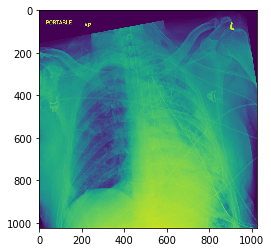

In [111]:
plt.imshow(img)

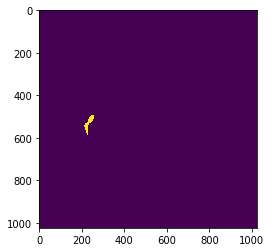

In [112]:
plt.imshow(mask)

In [113]:
mask_csv[mask_csv['ImageId'] == target_id][' EncodedPixels'].iloc[0]

' 503035 2 1022 5 1016 9 1013 11 1012 12 1010 14 1009 15 1008 17 1007 17 1006 18 1005 19 1004 20 1004 20 1003 21 1002 22 1002 21 1002 22 1002 22 1002 22 1001 23 1001 22 1001 23 1001 22 1001 23 1001 22 1001 22 1002 22 1002 21 1002 22 1002 21 1002 21 1003 20 1003 20 1003 20 1004 19 1004 18 1005 18 1005 18 1004 18 1005 18 1005 18 1004 20 1003 20 1003 20 1004 19 1004 20 1003 20 1004 19 1005 19 1005 18 1005 19 1005 18 1006 18 1006 18 1006 18 1006 17 1007 17 1008 16 1008 16 1008 16 1008 16 1008 16 1009 16 1008 16 1008 16 1008 16 1008 16 1009 15 1009 15 1010 14 1010 14 1011 13 1011 13 1012 12 1012 12 1012 12 1013 11 1013 12 1013 11 1013 11 1013 11 1014 10 1014 10 1015 9 1015 9 1016 8 1016 8 1017 7 1017 7 1017 7 1018 6 1018 6 1019 5 1019 5 1020 4 1021 3 1022 2'

In [78]:
len(mask_csv)

11582

In [82]:
mask_csv['ImageId'].nunique()

10675

In [86]:
np.unique(mask)

array([  0., 255.])

In [34]:
glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/*.npy')

['/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.2993.1517875175.586359.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.3991.1517875180.551936.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.4267.1517875182.25165.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.11516.1517875233.300096.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.4864.1517875185.165826.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.4669.1517875184.50463.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.10320.1517875223.142884.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1

In [33]:
len(glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/*'))

2136

In [26]:
df = pd.read_csv('/data/pneumo_log/val_1/val_predictions/2019_0808_0447/thresh_evaluation.csv').groupby('thresh').mean()


In [31]:
glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/*/')

['/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_2/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_3/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_1/']

In [107]:
np.unique(mask)

array([0, 1], dtype=uint8)

In [29]:
import data_prep
a = data_prep.run_save_train()


100%|██████████| 10/10 [00:00<00:00, 164.37it/s]

In [30]:
pd.read_csv('/data/pneumo/train/meta.csv')

,age,body_part,class,height,id,modality,name,path,pixel_spacing,sex,storage_type,view,width
0,24,CHEST,0,1024,0c6d6765-1866-44a3-aaa6-8dad35fc3f16,CR,0c6d6765-1866-44a3-aaa6-8dad35fc3f16,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.139', '0.139']",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
1,49,CHEST,0,1024,164db948-0b0e-4c65-a95c-7d228e7fdb34,CR,164db948-0b0e-4c65-a95c-7d228e7fdb34,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.14300000000000002', '0.14300000000000002']",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
2,64,CHEST,0,1024,d9251d05-4363-44c8-a7b4-69c8960aae62,CR,d9251d05-4363-44c8-a7b4-69c8960aae62,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.139', '0.139']",M,1.2.840.10008.5.1.4.1.1.7,PA,1024
3,60,CHEST,0,1024,417855ff-3d9b-4b41-bc19-b438f7b38d71,CR,417855ff-3d9b-4b41-bc19-b438f7b38d71,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.14300000000000002', '0.14300000000000002']",M,1.2.840.10008.5.1.4.1.1.7,PA,1024
4,51,CHEST,0,1024,727b7115-0812-45c9-96a6-31be1a7f5d7b,CR,727b7115-0812-45c9-96a6-31be1a7f5d7b,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.139', '0.139']",M,1.2.840.10008.5.1.4.1.1.7,AP,1024
5,58,CHEST,1,1024,d3c747da-7700-4842-9f66-7dc107287018,CR,d3c747da-7700-4842-9f66-7dc107287018,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.139', '0.139']",M,1.2.840.10008.5.1.4.1.1.7,AP,1024
6,62,CHEST,0,1024,88245df4-d9fd-4a84-9ecf-ce8af4b90cb5,CR,88245df4-d9fd-4a84-9ecf-ce8af4b90cb5,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.14300000000000002', '0.14300000000000002']",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
7,62,CHEST,0,1024,34365268-70b8-4405-8034-8f53cbeaeb55,CR,34365268-70b8-4405-8034-8f53cbeaeb55,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.168', '0.168']",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
8,78,CHEST,0,1024,ff143b17-eeb6-4f4c-8a68-903605b3c888,CR,ff143b17-eeb6-4f4c-8a68-903605b3c888,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.168', '0.168']",F,1.2.840.10008.5.1.4.1.1.7,AP,1024
9,40,CHEST,0,1024,f193a755-27a2-4d75-a98a-120ed510d7b0,CR,f193a755-27a2-4d75-a98a-120ed510d7b0,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"['0.139', '0.139']",M,1.2.840.10008.5.1.4.1.1.7,AP,1024


In [11]:
meta_df

,age,body_part,class,height,id,modality,name,path,pixel_spacing,sex,storage_type,view,width
0,24,CHEST,0,1024,0c6d6765-1866-44a3-aaa6-8dad35fc3f16,CR,0c6d6765-1866-44a3-aaa6-8dad35fc3f16,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.139, 0.139]",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
1,49,CHEST,0,1024,164db948-0b0e-4c65-a95c-7d228e7fdb34,CR,164db948-0b0e-4c65-a95c-7d228e7fdb34,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.14300000000000002, 0.14300000000000002]",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
2,64,CHEST,0,1024,d9251d05-4363-44c8-a7b4-69c8960aae62,CR,d9251d05-4363-44c8-a7b4-69c8960aae62,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.139, 0.139]",M,1.2.840.10008.5.1.4.1.1.7,PA,1024
3,60,CHEST,0,1024,417855ff-3d9b-4b41-bc19-b438f7b38d71,CR,417855ff-3d9b-4b41-bc19-b438f7b38d71,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.14300000000000002, 0.14300000000000002]",M,1.2.840.10008.5.1.4.1.1.7,PA,1024
4,51,CHEST,0,1024,727b7115-0812-45c9-96a6-31be1a7f5d7b,CR,727b7115-0812-45c9-96a6-31be1a7f5d7b,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.139, 0.139]",M,1.2.840.10008.5.1.4.1.1.7,AP,1024
5,58,CHEST,1,1024,d3c747da-7700-4842-9f66-7dc107287018,CR,d3c747da-7700-4842-9f66-7dc107287018,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.139, 0.139]",M,1.2.840.10008.5.1.4.1.1.7,AP,1024
6,62,CHEST,0,1024,88245df4-d9fd-4a84-9ecf-ce8af4b90cb5,CR,88245df4-d9fd-4a84-9ecf-ce8af4b90cb5,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.14300000000000002, 0.14300000000000002]",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
7,62,CHEST,0,1024,34365268-70b8-4405-8034-8f53cbeaeb55,CR,34365268-70b8-4405-8034-8f53cbeaeb55,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.168, 0.168]",F,1.2.840.10008.5.1.4.1.1.7,PA,1024
8,78,CHEST,0,1024,ff143b17-eeb6-4f4c-8a68-903605b3c888,CR,ff143b17-eeb6-4f4c-8a68-903605b3c888,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.168, 0.168]",F,1.2.840.10008.5.1.4.1.1.7,AP,1024
9,40,CHEST,0,1024,f193a755-27a2-4d75-a98a-120ed510d7b0,CR,f193a755-27a2-4d75-a98a-120ed510d7b0,/data/pneumo/train/1.2.276.0.7230010.3.1.4.832...,"[0.139, 0.139]",M,1.2.840.10008.5.1.4.1.1.7,AP,1024


In [13]:
save_numpy_list = glob('/data/pneumo/train/*')

In [24]:
# target_path = '/data/pneumo/train/1.2.276.0.7230010.3.1.4.8323329.4580.1517875183.601524.npy'
target_path = save_numpy_list[0]

In [25]:
data = np.load(target_path)[()]

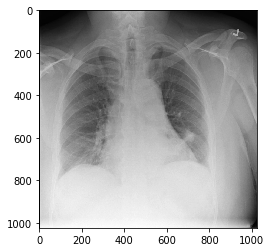

In [26]:
plt.imshow(data['img'], cmap='gray')

In [69]:
im = data['img']


In [70]:
im.shape

(1024, 1024)

In [76]:
import cv2
im_resize = cv2.resize(im, (256, 256))


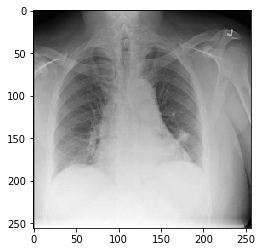

In [78]:
plt.imshow(im_resize, cmap='gray')

In [116]:
# mask = data['mask']
mask_resize = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)

In [117]:
np.unique(mask_resize)

array([  0., 255.])

In [12]:
rle = mask_csv[mask_csv['ImageId'] == '1.2.276.0.7230010.3.1.4.8323329.4580.1517875183.601524'][' EncodedPixels']


[autoreload of data_prep failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/opt/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/yusuke/work/siim_pneumo/data_prep.py", line 38
    

NameError: name 'mask_csv' is not defined

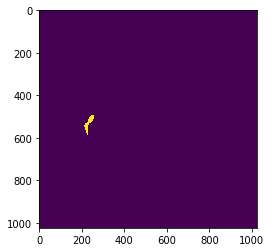

In [29]:
plt.imshow(rle2mask(rle.iloc[0], 1024, 1024))

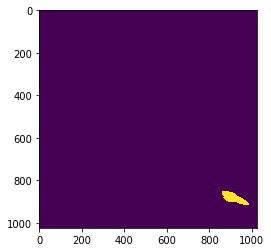

In [31]:
plt.imshow(rle2mask(rle.iloc[1], 1024, 1024))

In [45]:
a = data_prep.make_fold_df()

In [52]:
a[a['fold']=='5']['class'].value_counts()

0    1659
1     476
Name: class, dtype: int64

In [2]:
import data_generator
datagenerator = data_generator.DataGenerator(aug=False)
train_gen = datagenerator.generate(train=True)
val_gen = datagenerator.generate(train=False)

image_batch, mask_batch = next(train_gen)

Using TensorFlow backend.


AttributeError: 'DataGenerator' object has no attribute 'generate'

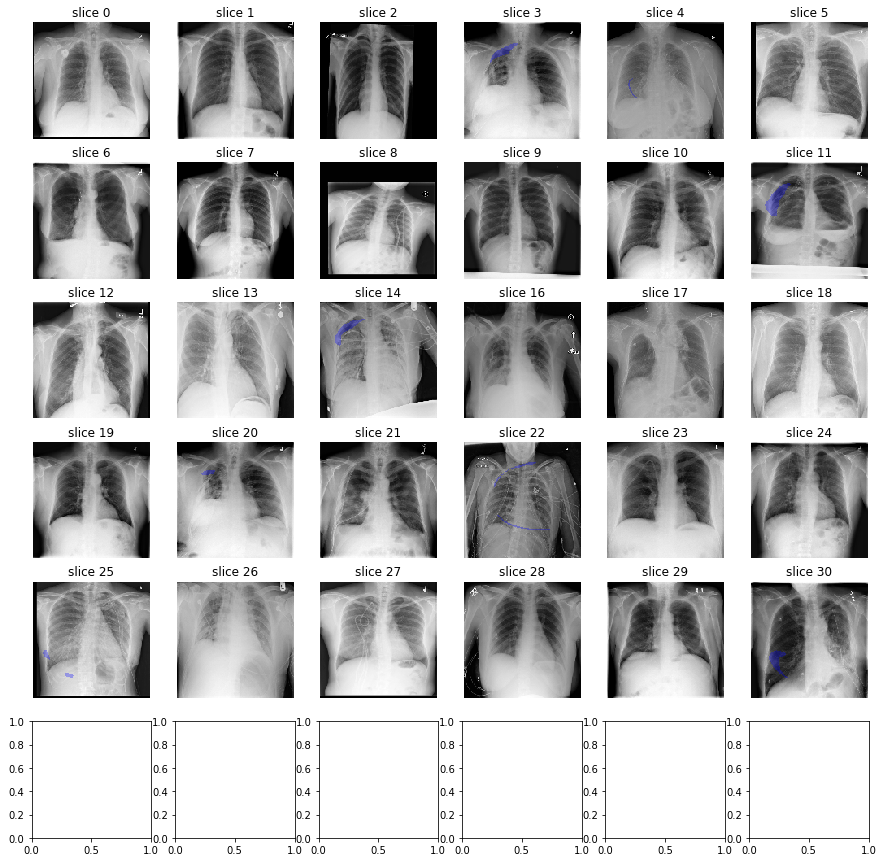

In [153]:
import utils
utils.vis_slices(image_batch, mask_batch)

In [3]:
path_list = glob('/data/pneumo/fold/1/*.npy')

In [4]:
target = path_list[12]
data = np.load(target)[()]
img = data['img']
mask = data['mask']

In [6]:
target

'/data/pneumo/fold/1/1.2.276.0.7230010.3.1.4.8323329.481.1517875163.149606.npy'

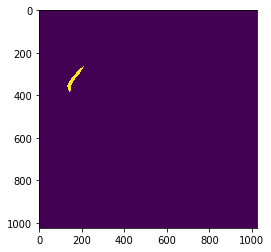

In [174]:
plt.imshow(mask)

In [ ]:
image_batch

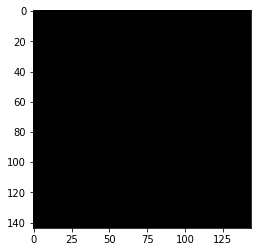

In [130]:
plt.imshow(mask_batch[2], cmap='gray')

In [3]:
import data_generator
train_gen = data_generator.DataGenerator(mode='train')
val_gen = data_generator.DataGenerator(mode='val')
print(len(train_gen), len(val_gen))
i, m = train_gen.__getitem__(0)
print(i.shape, m.shape)

240 26
(32, 144, 144, 1) (32, 144, 144, 1)


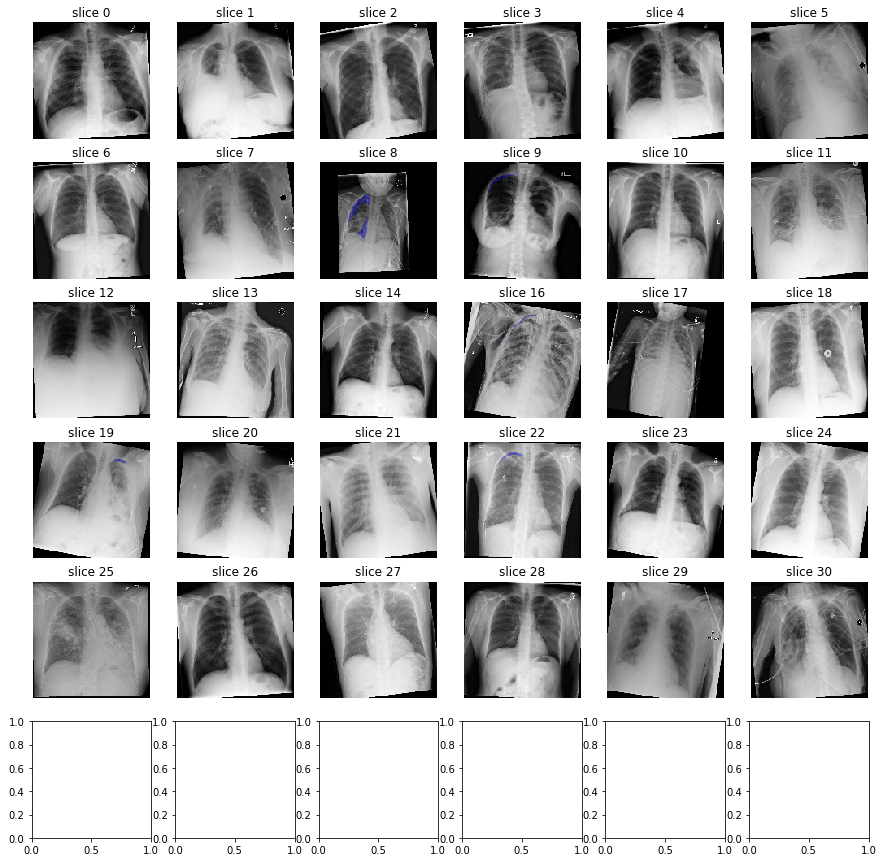

In [4]:
import utils
utils.vis_slices(i, m)

In [28]:
t = i[0]
t = np.squeeze(t)

In [29]:
t = np.stack((t, t, t), axis=-1)

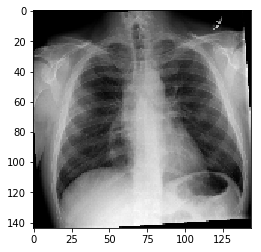

In [33]:
plt.imshow(t)

In [16]:
np.unique(m)

array([0, 1], dtype=uint8)

In [7]:
import pred_util

Using TensorFlow backend.


In [33]:
pred_util._save_preds()

  0%|          | 0/2135 [00:00<?, ?it/s]

saving dirs: /data/pneumo_log/val_1/val_predictions/2019_0805_0344/


100%|██████████| 2135/2135 [04:45<00:00,  5.19it/s]


In [20]:
paths = glob('/data/pneumo_log/val_1val_predictions/2019_0805_0344/*.npy')

In [24]:
d = np.load(paths[0])[()]

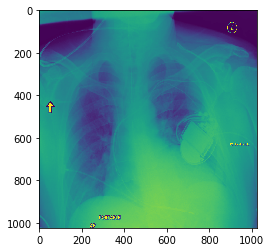

In [31]:
plt.imshow(d['img'])

In [35]:
d['mask'].shape

(1024, 1024)

In [4]:
import numpy as np

In [19]:
import eval_util
df= eval_util.eval_all_pred()




  0%|          | 0/2135 [00:00<?, ?it/s]


  0%|          | 1/2135 [00:00<08:15,  4.31it/s]


  0%|          | 5/2135 [00:00<06:05,  5.82it/s]


  0%|          | 10/2135 [00:00<04:47,  7.39it/s]


  1%|          | 26/2135 [00:00<03:29, 10.08it/s]


  2%|▏         | 35/2135 [00:01<02:41, 13.02it/s]


  2%|▏         | 45/2135 [00:01<02:02, 17.03it/s]


  2%|▏         | 51/2135 [00:01<01:55, 18.04it/s]


  4%|▎         | 77/2135 [00:01<01:22, 25.01it/s]


  4%|▍         | 88/2135 [00:01<01:09, 29.49it/s]


  5%|▍         | 97/2135 [00:02<01:04, 31.49it/s]


  5%|▌         | 114/2135 [00:02<00:56, 35.78it/s]


  6%|▌         | 122/2135 [00:02<00:52, 38.13it/s]


  6%|▌         | 129/2135 [00:02<00:48, 41.09it/s]


  7%|▋         | 142/2135 [00:03<00:48, 41.21it/s]


  8%|▊         | 163/2135 [00:03<00:36, 53.58it/s]


  8%|▊         | 173/2135 [00:03<00:42, 46.53it/s]


  8%|▊         | 181/2135 [00:03<00:41, 47.18it/s]


  9%|▉         | 193/2135 [00:03<00:45, 43.12it/s]


 10%|▉      

In [21]:
df.groupby('thresh').mean()

,score
thresh,
0.00,0.005555
0.05,0.709740
0.10,0.713817
0.15,0.717236
0.20,0.718922
0.25,0.719268
0.30,0.720586
0.35,0.721451
0.40,0.721870


In [26]:
image_id = df.iloc[0]['image_id']


In [28]:
data_path = '/data/pneumo_log/val_1/val_predictions/2019_0805_0344/' + image_id + '.npy' 
pred = np.load(data_path)[()]['pred']


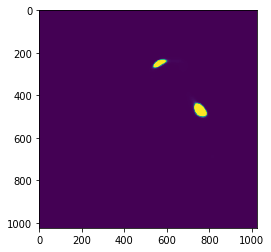

In [30]:
plt.imshow(pred)

In [31]:
mask = np.load(data_path)[()]['mask']

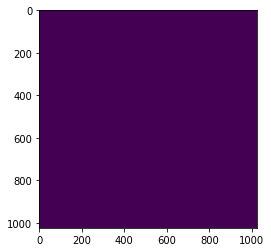

In [32]:
plt.imshow(mask)

## make stratified train and val split

In [6]:
data_path='/data/pneumo/fold/[!1]/'
all_data_paths = glob(data_path+'*.npy')

In [8]:
len(all_data_paths)

8540

In [12]:
csv_path = '/'.join(data_path.split('/')[:-2]) + '/meta.csv'

In [17]:
all_data =pd.read_csv(csv_path)

In [19]:
# all_data.head()

In [41]:
train_all_data= pd.DataFrame([[path.split('/')[-1].split('.npy')[0], path] for path in all_data_paths], columns=['image_id', 'npy_path'])

In [42]:
image_id_class_df = train_all_data.merge(all_data, on='image_id')

In [43]:
image_id_class_df = image_id_class_df.sort_values('class')[['npy_path', 'class']]

In [56]:
paths = image_id_class_df['npy_path'].values
classes = image_id_class_df['class'].values
    

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, train_size=0.9, random_state=0)
train_paths, test_paths, _, _ = train_test_split(paths, classes, stratify=classes, test_size=0.1)

In [60]:
len(train_paths)

7686

In [61]:
len(test_paths)

854

In [68]:
split_train_df= pd.DataFrame([[path.split('/')[-1].split('.npy')[0], path] for path in train_paths], columns=['image_id', 'npy_path'])
split_test_df= pd.DataFrame([[path.split('/')[-1].split('.npy')[0], path] for path in test_paths], columns=['image_id', 'npy_path'])


In [69]:
split_train_df_con = split_train_df.merge(all_data, on='image_id')
split_test_df_con = split_test_df.merge(all_data, on='image_id')

In [73]:
split_train_df_con['class'].value_counts().iloc[0]/split_train_df_con['class'].value_counts().iloc[1]

3.484247374562427

In [74]:
split_test_df_con['class'].value_counts().iloc[0]/split_test_df_con['class'].value_counts().iloc[1]

3.4947368421052634

## tweakk data generator to return train and val gen at once

In [111]:
import data_generator
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,OneOf,
    ToFloat, ShiftScaleRotate,GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
    RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise,CenterCrop,
    IAAAdditiveGaussianNoise,GaussNoise,OpticalDistortion,RandomSizedCrop
)
    
fold = '1'
output_ch = 1
input_shape = (256, 256, 3)
target_shape = input_shape[:2]
img_ch = input_shape[-1]
AUGMENTATIONS = Compose([
    HorizontalFlip(p=0.5),
    OneOf([
        RandomContrast(),
        RandomGamma(),
        RandomBrightness(),
         ], p=0.3),
    OneOf([
        ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        GridDistortion(),
        OpticalDistortion(distort_limit=2, shift_limit=0.5),
        ], p=0.3),
    RandomSizedCrop(min_max_height=(156, 256), height=input_shape[0], width=input_shape[1],p=0.25),
    ToFloat(max_value=1)
],p=1)
maxrotate=10
batch_size=16 
train_gen = data_generator.DataGenerator(batch_size=batch_size,
                                             mode='train',
                                             img_ch=img_ch,
                                             data_path='/data/pneumo/fold/[!'+fold+']/',
                                             target_shape=target_shape,
                                             output_ch=output_ch,
                                             aug=AUGMENTATIONS)
val_gen = data_generator.DataGenerator(batch_size=batch_size,
                                             mode='val',
                                             img_ch=img_ch,
                                             data_path='/data/pneumo/fold/[!'+fold+']/',
                                             target_shape=target_shape,
                                             output_ch=output_ch,
                                             aug=AUGMENTATIONS)
# train_gen = datagenerator.generate(train=True)
# val_gen = datagenerator.generate(train=False)
zero_weight=1
one_weight=1

In [112]:
t, va = train_gen.get_train_val_gens()

In [113]:
t.mode

'train'

In [114]:
va.mode

'val'

(16, 256, 256, 3)
(16, 256, 256, 1)


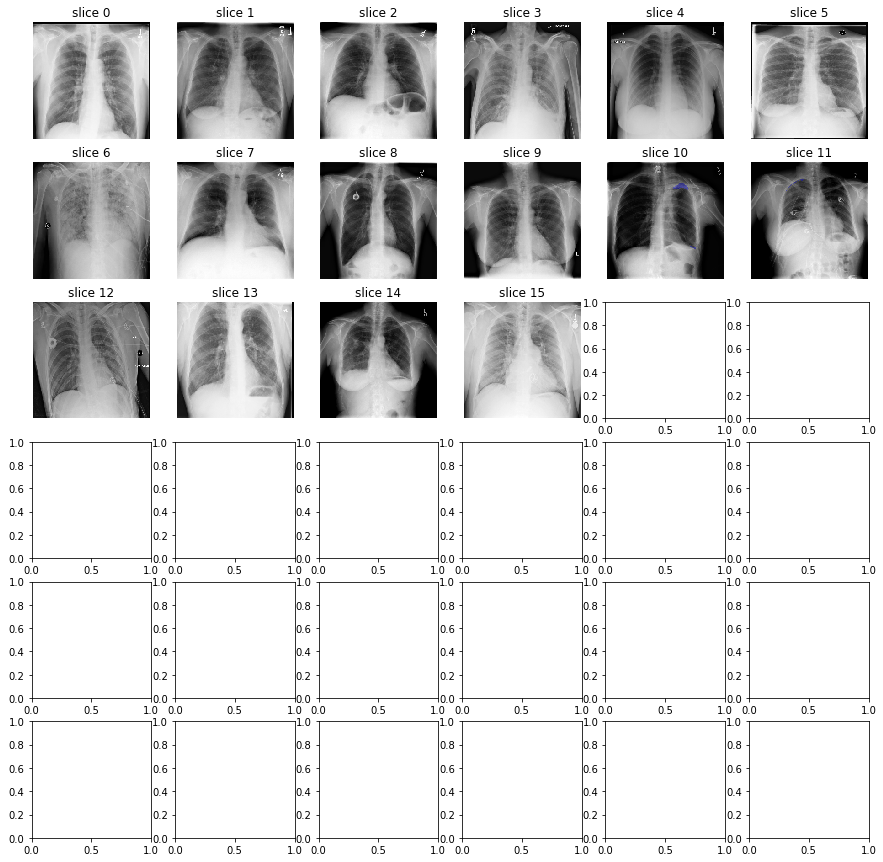

In [115]:
import utils
v, m = val_gen.__getitem__(0)
print(v.shape)
print(m.shape)
if img_ch == 3:
    v = v[:, :, :, 0]
# v = np.squeeze(v)
# m = np.argmax(m, axis=-1)
utils.vis_slices(v, m)


(16, 256, 256, 3)
(16, 256, 256, 1)


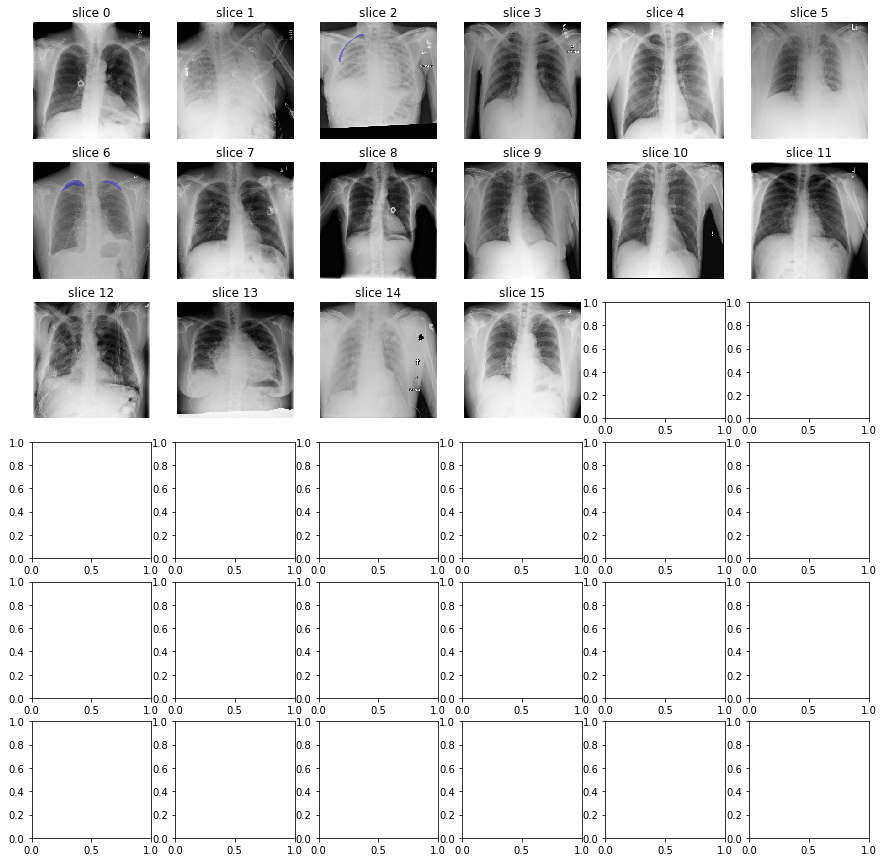

In [116]:
v, m = va.__getitem__(0)
print(v.shape)
print(m.shape)
if img_ch == 3:
    v = v[:, :, :, 0]
# v = np.squeeze(v)
# m = np.argmax(m, axis=-1)
utils.vis_slices(v, m)

## Submission work

In [6]:

test_data_path = '/data/pneumo/dicom-images-test/*/*/*.dcm'

In [7]:
test_list = glob(test_data_path)

In [8]:
dataset = pydicom.dcmread(test_list[0])

In [9]:
im = dataset.pixel_array

In [12]:
im.shape

(1024, 1024)

In [10]:
import pred_util
model_path = '/data/pneumo_log/val_1/2019_0808_0447/best_weights.hdf5'
model = pred_util._load_model(model_path=model_path)
pred = pred_util._pred_img(im, model)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [11]:
pred_b = np.where(pred>0.005, 1, 0)

In [14]:
pred_ = (pred_b.T*255).astype(np.uint8)

In [15]:
pred_.shape

(1024, 1024)

In [16]:
from mask_functions import mask2rle
mask2rl(pred_, 1024, 1024)

NameError: name 'mask2rl' is not defined

In [3]:
metric = 0.0
pred = 0
metric += (pred==0)

In [20]:
for i in np.arange(0, 1, 0.05):
    print('dice_value: ', i)
    
    dice = np.floor(max(0, (i - 0.45)*20)) / 10
    print('step_dice_value: ',dice)

dice_value:  0.0
step_dice_value:  0.0
dice_value:  0.05
step_dice_value:  0.0
dice_value:  0.1
step_dice_value:  0.0
dice_value:  0.15000000000000002
step_dice_value:  0.0
dice_value:  0.2
step_dice_value:  0.0
dice_value:  0.25
step_dice_value:  0.0
dice_value:  0.30000000000000004
step_dice_value:  0.0
dice_value:  0.35000000000000003
step_dice_value:  0.0
dice_value:  0.4
step_dice_value:  0.0
dice_value:  0.45
step_dice_value:  0.0
dice_value:  0.5
step_dice_value:  0.0
dice_value:  0.55
step_dice_value:  0.2
dice_value:  0.6000000000000001
step_dice_value:  0.3
dice_value:  0.65
step_dice_value:  0.4
dice_value:  0.7000000000000001
step_dice_value:  0.5
dice_value:  0.75
step_dice_value:  0.6
dice_value:  0.8
step_dice_value:  0.7
dice_value:  0.8500000000000001
step_dice_value:  0.8
dice_value:  0.9
step_dice_value:  0.9
dice_value:  0.9500000000000001
step_dice_value:  1.0


In [9]:
'/'.join(model_path.split('/')[:-1])

NameError: name 'model_path' is not defined